In [4]:
import pandas as pd
!pip install yfinance
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [10]:
# Define the stock symbols
stocks_symbol = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'SUNPHARMA.NS', 'DRREDDY.NS']

In [14]:
# Fetch historical data for the last 10 years
stocks_data = yf.download(stocks_symbol, start='2014-01-01', end='2024-01-01')


[*********************100%%**********************]  9 of 9 completed


In [16]:
# Display the first few rows of the data
stocks_data.head()


Price         Adj Close                                                     \
Ticker       DRREDDY.NS HDFCBANK.NS HINDUNILVR.NS ICICIBANK.NS     INFY.NS   
Date                                                                         
2014-01-01  2336.212402  305.065735    482.536896   177.500107  335.909424   
2014-01-02  2327.971436  301.327820    474.148254   173.926514  337.125000   
2014-01-03  2297.772949  304.125519    476.340271   172.503540  345.319336   
2014-01-06  2275.261963  303.483429    475.075653   168.299271  340.742706   
2014-01-07  2293.675781  304.721771    471.239685   169.786942  334.858582   

Price                                                              Close  ...  \
Ticker          ITC.NS RELIANCE.NS SUNPHARMA.NS      TCS.NS   DRREDDY.NS  ...   
Date                                                                      ...   
2014-01-01  159.667068  379.456024   531.537903  864.619324  2537.449951  ...   
2014-01-02  155.977463  373.564423   532.930969  870.120300  2528.500000  ...   
2014-01-03  155.878433  368.974915   538.363892  892.285034  2495.699951  ...   
2014-01-06  156.324127  365.004425   546.304199  899.271606  2471.250000  ...   
2014-01-07  156.844162  359.518372   551.829834  885.840210  2491.250000  ...   

Price              Open     Volume                                         \
Ticker           TCS.NS DRREDDY.NS HDFCBANK.NS HINDUNILVR.NS ICICIBANK.NS   
Date                                                                        
2014-01-01  1090.050049      27816     2246218        251204      3102869   
2014-01-02  1083.000000     102531     3614496        531660     11321513   
2014-01-03  1082.349976     106312     3256592       1018173     15567502   
2014-01-06  1114.500000     132967     2981710        603727     14802265   
2014-01-07  1120.000000     223225     3948460        605461     18566515   

Price                                                             
Ticker       INFY.NS    ITC.NS RELIANCE.NS SUNPHARMA.NS   TCS.NS  
Date                                                              
2014-01-01   1478688   1859278     2924699       425464   529952  
2014-01-02   4404744   6784786     3011816      1311399  1726948  
2014-01-03  10046344  11999877     6416948      1443488  2618174  
2014-01-06  11098328   8155128     6657928      1832494  2311810  
2014-01-07   7713688   7779138     8655735      2986634  2897486  

[5 rows x 54 columns]

In [18]:
# Extract the adjusted closing prices
adj_close_prices = stocks_data['Adj Close']

In [20]:
adj_close_prices

Ticker,DRREDDY.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,,,,,
2014-01-01,2336.212402,305.065735,482.536896,177.500107,335.909424,159.667068,379.456024,531.537903,864.619324
2014-01-02,2327.971436,301.327820,474.148254,173.926514,337.125000,155.977463,373.564423,532.930969,870.120300
2014-01-03,2297.772949,304.125519,476.340271,172.503540,345.319336,155.878433,368.974915,538.363892,892.285034
2014-01-06,2275.261963,303.483429,475.075653,168.299271,340.742706,156.324127,365.004425,546.304199,899.271606
2014-01-07,2293.675781,304.721771,471.239685,169.786942,334.858582,156.844162,359.518372,551.829834,885.840210
...,...,...,...,...,...,...,...,...,...
2023-12-22,5594.570312,1648.341187,2550.749023,994.299988,1554.140869,440.793060,2565.050049,1232.691895,3770.140381
2023-12-26,5598.994141,1659.784912,2559.810791,995.099976,1535.297119,442.003510,2578.050049,1236.507812,3742.091064
2023-12-27,5680.859375,1680.354126,2583.133545,1002.250000,1558.317383,442.632935,2586.850098,1241.414185,3757.520508


In [24]:
# Resample the data to quarterly frequency and calculate the last value of each quarter
quarterly_prices = adj_close_prices.resample('QE').last()

In [26]:
quarterly_prices

Ticker,DRREDDY.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,,,,,
2014-03-31,2360.564209,343.431122,510.527130,201.326889,317.971008,174.747269,397.365845,533.766724,858.054626
2014-06-30,2415.944092,379.984344,529.204102,236.697021,319.663239,163.900589,437.782928,638.895020,984.973755
2014-09-30,2993.800293,403.619263,636.392578,239.267365,367.992523,186.666702,407.732300,797.515076,1128.680542
2014-12-31,3009.187744,440.135284,653.782654,294.671692,390.359070,185.910324,384.213379,768.953979,1057.254883
2015-03-31,3234.028564,473.020599,751.364136,263.293365,439.001709,164.303986,356.124390,952.552429,1057.590332
2015-06-30,3299.566895,493.579681,796.791992,261.454620,395.504486,162.087891,436.619019,813.656006,1066.167969
2015-09-30,3879.236572,498.058411,708.177612,229.494354,466.862823,169.108353,376.458954,807.888000,1083.998779
2015-12-31,2897.160400,504.279449,756.160095,221.854431,448.226105,168.594070,442.949402,765.544739,1022.892639
2016-03-31,2828.752686,499.153595,762.076233,200.887161,494.005676,168.825485,461.446259,765.404785,1060.479736


In [28]:
# Calculate the quarterly percentage returns
quarterly_returns = quarterly_prices.pct_change().dropna() * 100

In [30]:
quarterly_returns

Ticker,DRREDDY.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,,,,,
2014-06-30,2.346044,10.643538,3.658370,17.568509,0.532196,-6.207067,10.171253,19.695551,14.791497
2014-09-30,23.918443,6.219972,20.254657,1.085921,15.118812,13.890196,-6.864276,24.827249,14.589910
2014-12-31,0.513977,9.047145,2.732602,23.155823,6.077989,-0.405203,-5.768226,-3.581261,-6.328244
2015-03-31,7.471811,7.471638,14.925676,-10.648572,12.460999,-11.621914,-7.310779,23.876390,0.031728
2015-06-30,2.026523,4.346340,6.046051,-0.698364,-9.908213,-1.348777,22.602953,-14.581499,0.811055
2015-09-30,17.568054,0.907397,-11.121394,-12.224020,18.042359,4.331269,-13.778618,-0.708900,1.672420
2015-12-31,-25.316223,1.249058,6.775487,-3.329024,-3.991905,-0.304114,17.662071,-5.241229,-5.637104
2016-03-31,-2.361199,-1.016471,0.782392,-9.450913,10.213500,0.137262,4.175840,-0.018282,3.674589
2016-06-30,11.416044,10.731992,4.481567,3.739956,-2.779916,12.859753,-7.276119,-6.939026,2.352359


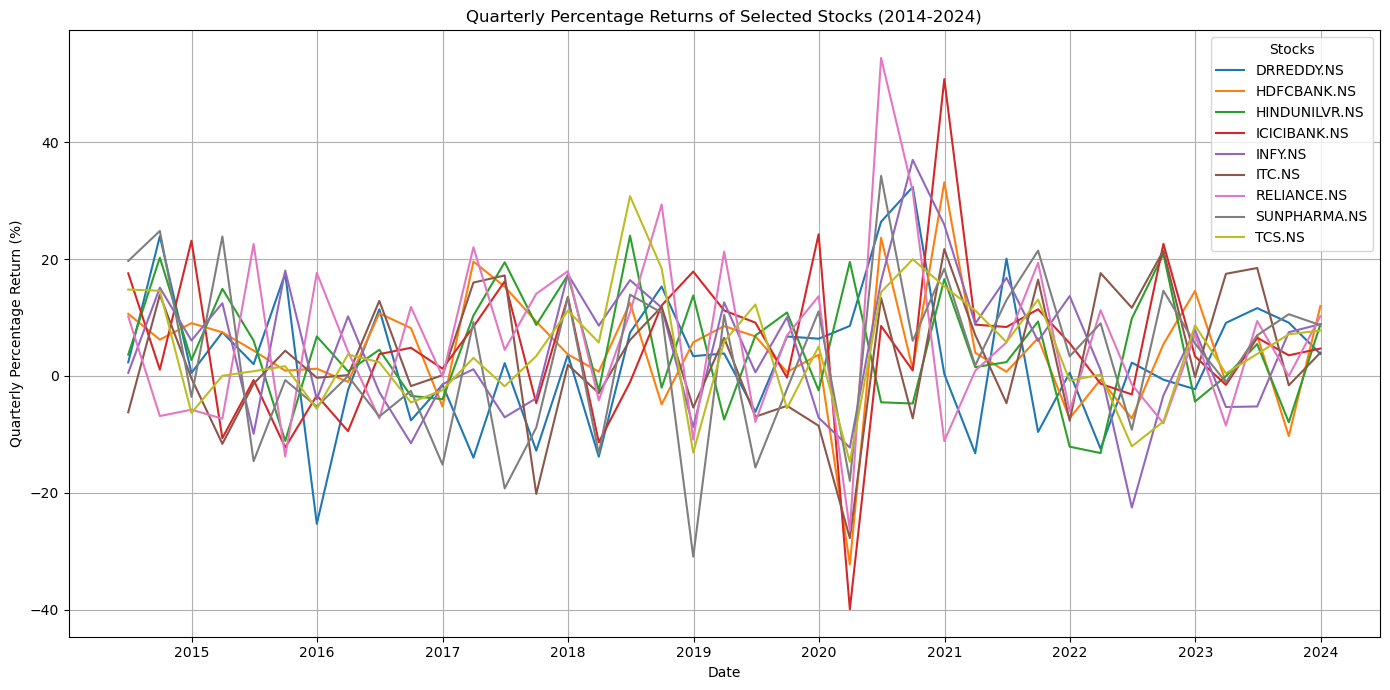

In [32]:
# Plot the individual quarterly percentage returns
plt.figure(figsize=(14, 7))

for stock in quarterly_returns.columns:
    plt.plot(quarterly_returns.index, quarterly_returns[stock], label=stock)
# Adding titles, labels, and legends
plt.title('Quarterly Percentage Returns of Selected Stocks (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Quarterly Percentage Return (%)')
plt.legend(title='Stocks')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
hdfc_adj_close_prices= adj_close_prices['HDFCBANK.NS']



In [40]:
hdfc_adj_close_prices

Date
2014-01-01     305.065735
2014-01-02     301.327820
2014-01-03     304.125519
2014-01-06     303.483429
2014-01-07     304.721771
                 ...     
2023-12-22    1648.341187
2023-12-26    1659.784912
2023-12-27    1680.354126
2023-12-28    1682.277710
2023-12-29    1686.223877
Name: HDFCBANK.NS, Length: 2465, dtype: float64

In [124]:
# Calculate the investment value over time
initial_investment = 10000
hdfc_investment_value = (hdfc_adj_close_prices / hdfc_adj_close_prices.iloc[0]) * initial_investment


In [132]:
hdfc_investment_value

Date
2014-01-01    10000.000000
2014-01-02     9877.471816
2014-01-03     9969.179886
2014-01-06     9948.132297
2014-01-07     9988.724934
                  ...     
2023-12-22    54032.328057
2023-12-26    54407.451327
2023-12-27    55081.706463
2023-12-28    55144.761201
2023-12-29    55274.115846
Name: HDFCBANK.NS, Length: 2465, dtype: float64

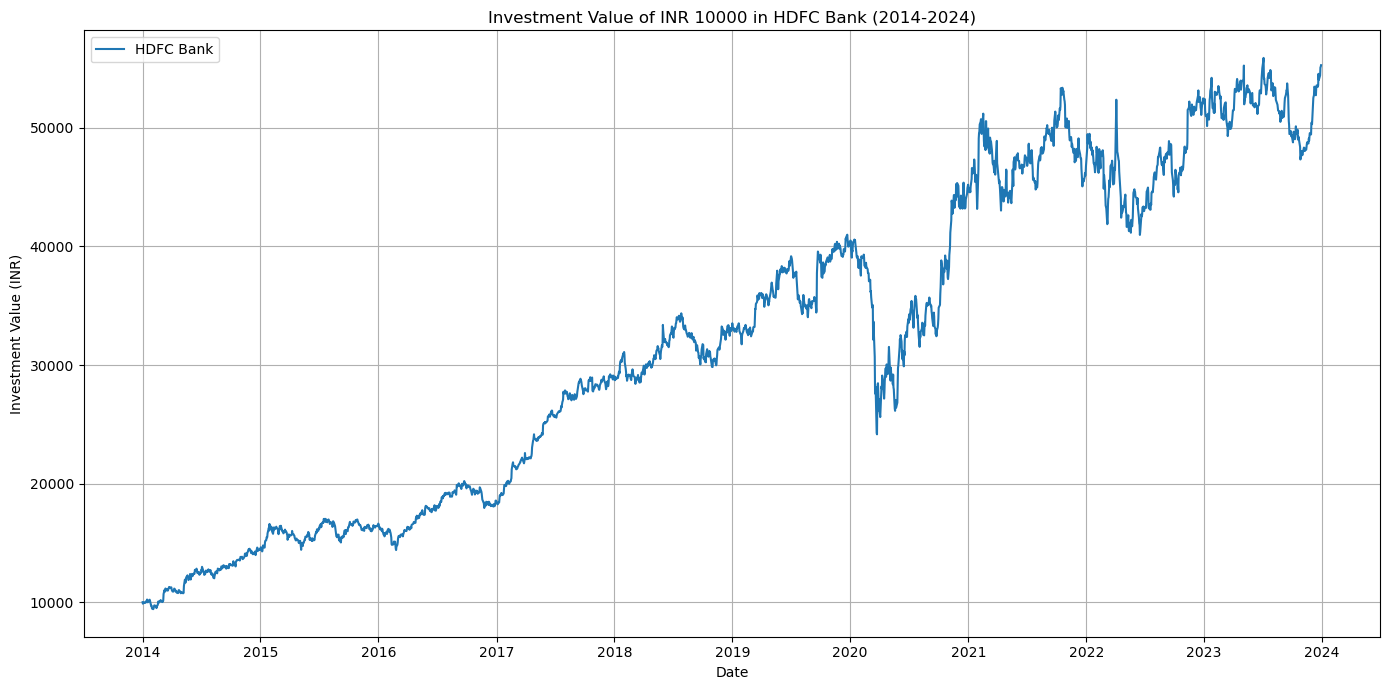

In [136]:
# Plot the investment value over time
plt.figure(figsize=(14, 7))
plt.plot(hdfc_investment_value.index, hdfc_investment_value, label='HDFC Bank')
plt.title('Investment Value of INR 10000 in HDFC Bank (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Investment Value (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [138]:
# Display the final investment value
final_value = hdfc_investment_value.iloc[-1]
print(f"If you had invested INR 10000 in HDFC Bank on 2014-01-01, your investment would be worth INR {final_value:.2f} on 2024-01-01.")

If you had invested INR 10000 in HDFC Bank on 2014-01-01, your investment would be worth INR 55274.12 on 2024-01-01.


In [140]:
# Calculate the investment value over time for each stock
initial_investment = 10000
investment_values = (adj_close_prices / adj_close_prices.iloc[0]) * initial_investment


In [142]:
investment_values

Ticker,DRREDDY.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,,,,,
2014-01-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2014-01-02,9964.725096,9877.471816,9826.155442,9798.670930,10036.187617,9768.918804,9844.735590,10026.208223,10063.623105
2014-01-03,9835.462507,9969.179886,9871.582364,9718.503450,10280.132424,9762.716552,9723.785921,10128.419605,10319.975620
2014-01-06,9739.105745,9948.132297,9845.374670,9481.643344,10143.886480,9790.630509,9619.149567,10277.803263,10400.780803
2014-01-07,9817.924855,9988.724934,9765.878821,9565.455738,9968.716499,9823.200456,9474.572775,10381.758874,10245.436178
...,...,...,...,...,...,...,...,...,...
2023-12-22,23947.181801,54032.328057,52861.222549,56016.867012,46266.664729,27607.011546,67598.084770,23191.044100,43604.627810
2023-12-26,23966.117700,54407.451327,53049.016843,56061.936720,45705.687612,27682.822371,67940.680464,23262.834238,43280.215486
2023-12-27,24316.536327,55081.706463,53532.353021,56464.754754,46390.999248,27722.243464,68172.592682,23355.139454,43458.669089


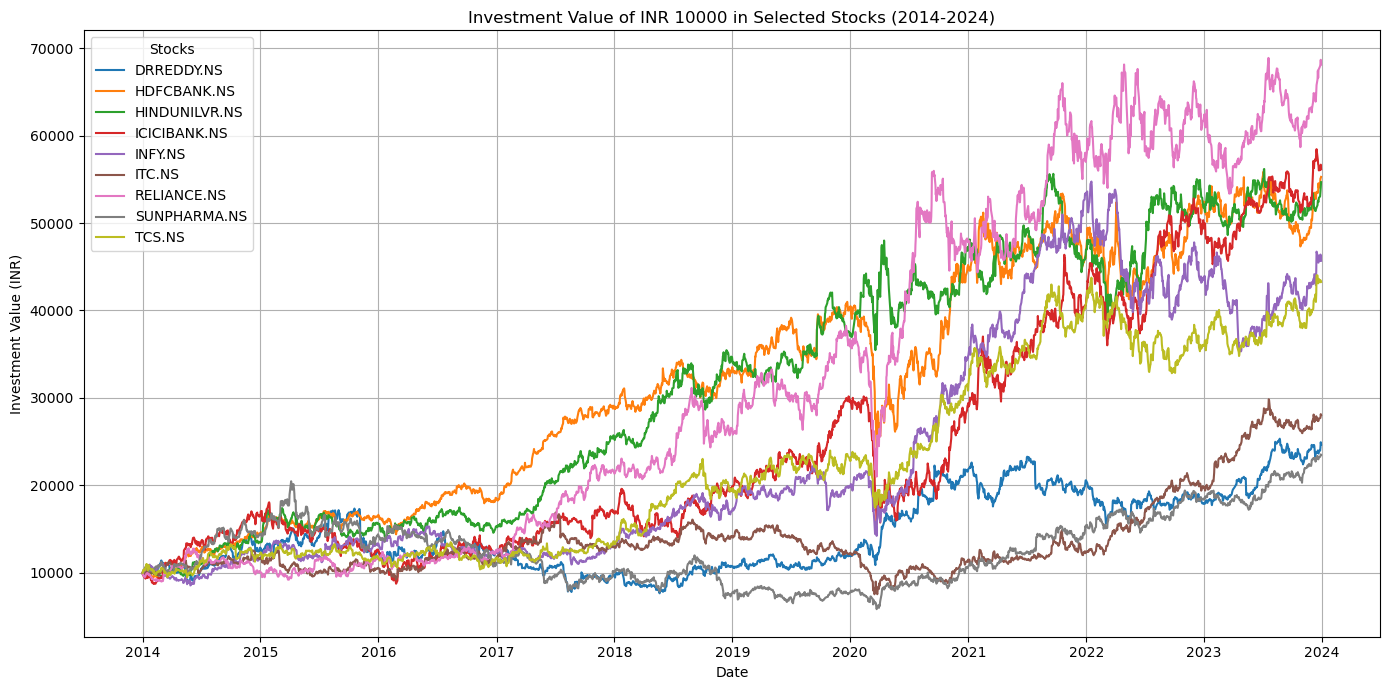

In [144]:
# Plot the investment values over time for each stock
plt.figure(figsize=(14, 7))

for stock in investment_values.columns:
    plt.plot(investment_values.index, investment_values[stock], label=stock)

# Adding titles, labels, and legends
plt.title('Investment Value of INR 10000 in Selected Stocks (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Investment Value (INR)')
plt.legend(title='Stocks')
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [146]:
# Display the final investment values
final_values = investment_values.iloc[-1]


In [148]:
final_values

Ticker
DRREDDY.NS       24671.421403
HDFCBANK.NS      55274.115846
HINDUNILVR.NS    54674.504794
ICICIBANK.NS     56146.443711
INFY.NS          45674.605799
ITC.NS           28025.482942
RELIANCE.NS      68122.517143
SUNPHARMA.NS     23485.673033
TCS.NS           43255.697493
Name: 2023-12-29 00:00:00, dtype: float64

In [150]:
for stock, value in final_values.items():
    print(f"If you had invested INR 10000 in {stock} on 2014-01-01, your investment would be worth INR {value:.2f} on 2024-01-01.")

If you had invested INR 10000 in DRREDDY.NS on 2014-01-01, your investment would be worth INR 24671.42 on 2024-01-01.
If you had invested INR 10000 in HDFCBANK.NS on 2014-01-01, your investment would be worth INR 55274.12 on 2024-01-01.
If you had invested INR 10000 in HINDUNILVR.NS on 2014-01-01, your investment would be worth INR 54674.50 on 2024-01-01.
If you had invested INR 10000 in ICICIBANK.NS on 2014-01-01, your investment would be worth INR 56146.44 on 2024-01-01.
If you had invested INR 10000 in INFY.NS on 2014-01-01, your investment would be worth INR 45674.61 on 2024-01-01.
If you had invested INR 10000 in ITC.NS on 2014-01-01, your investment would be worth INR 28025.48 on 2024-01-01.
If you had invested INR 10000 in RELIANCE.NS on 2014-01-01, your investment would be worth INR 68122.52 on 2024-01-01.
If you had invested INR 10000 in SUNPHARMA.NS on 2014-01-01, your investment would be worth INR 23485.67 on 2024-01-01.
If you had invested INR 10000 in TCS.NS on 2014-01-01,

In [78]:
# Define function to calculate returns
def calculate_returns(data, periods):
    if len(data) >= periods:
        return (data.iloc[-1] / data.iloc[-periods] - 1) * 100
    else:
        return pd.NA 

In [80]:
# Calculate the returns for each period
returns = {
    '3 Months': calculate_returns(adj_close_prices, 63),  # Approx. 63 trading days in 3 months
    '1 Year': calculate_returns(adj_close_prices, 252),  # Approx. 252 trading days in 1 year
    '5 Years': calculate_returns(adj_close_prices, 1260),  # Approx. 1260 trading days in 5 years
    '10 Years': calculate_returns(adj_close_prices, len(adj_close_prices))  # Use all available data
}

In [82]:
returns

{'3 Months': Ticker
 DRREDDY.NS        5.484438
 HDFCBANK.NS      11.946169
 HINDUNILVR.NS     7.264436
 ICICIBANK.NS      5.672781
 INFY.NS           6.535155
 ITC.NS            2.883230
 RELIANCE.NS       9.120269
 SUNPHARMA.NS     10.482914
 TCS.NS            5.959808
 dtype: float64,
 '1 Year': Ticker
 DRREDDY.NS       34.350525
 HDFCBANK.NS       7.245522
 HINDUNILVR.NS     2.270200
 ICICIBANK.NS     13.749558
 INFY.NS           4.062086
 ITC.NS           42.060323
 RELIANCE.NS       9.026681
 SUNPHARMA.NS     25.997532
 TCS.NS           20.234345
 dtype: float64,
 '5 Years': Ticker
 DRREDDY.NS       134.269104
 HDFCBANK.NS       72.833766
 HINDUNILVR.NS     64.508196
 ICICIBANK.NS     188.246887
 INFY.NS          183.838007
 ITC.NS            95.190865
 RELIANCE.NS      159.981878
 SUNPHARMA.NS     158.986645
 TCS.NS           129.023044
 dtype: float64,
 '10 Years': Ticker
 DRREDDY.NS       146.714214
 HDFCBANK.NS      452.741158
 HINDUNILVR.NS    446.745048
 ICICIBANK.NS     46

In [84]:
# Convert the returns dictionary to a DataFrame
returns_df = pd.DataFrame(returns)

In [86]:
returns_df

,3 Months,1 Year,5 Years,10 Years
Ticker,,,,
DRREDDY.NS,5.484438,34.350525,134.269104,146.714214
HDFCBANK.NS,11.946169,7.245522,72.833766,452.741158
HINDUNILVR.NS,7.264436,2.270200,64.508196,446.745048
ICICIBANK.NS,5.672781,13.749558,188.246887,461.464437
INFY.NS,6.535155,4.062086,183.838007,356.746058
ITC.NS,2.883230,42.060323,95.190865,180.254829
RELIANCE.NS,9.120269,9.026681,159.981878,581.225171
SUNPHARMA.NS,10.482914,25.997532,158.986645,134.856730
TCS.NS,5.959808,20.234345,129.023044,332.556975


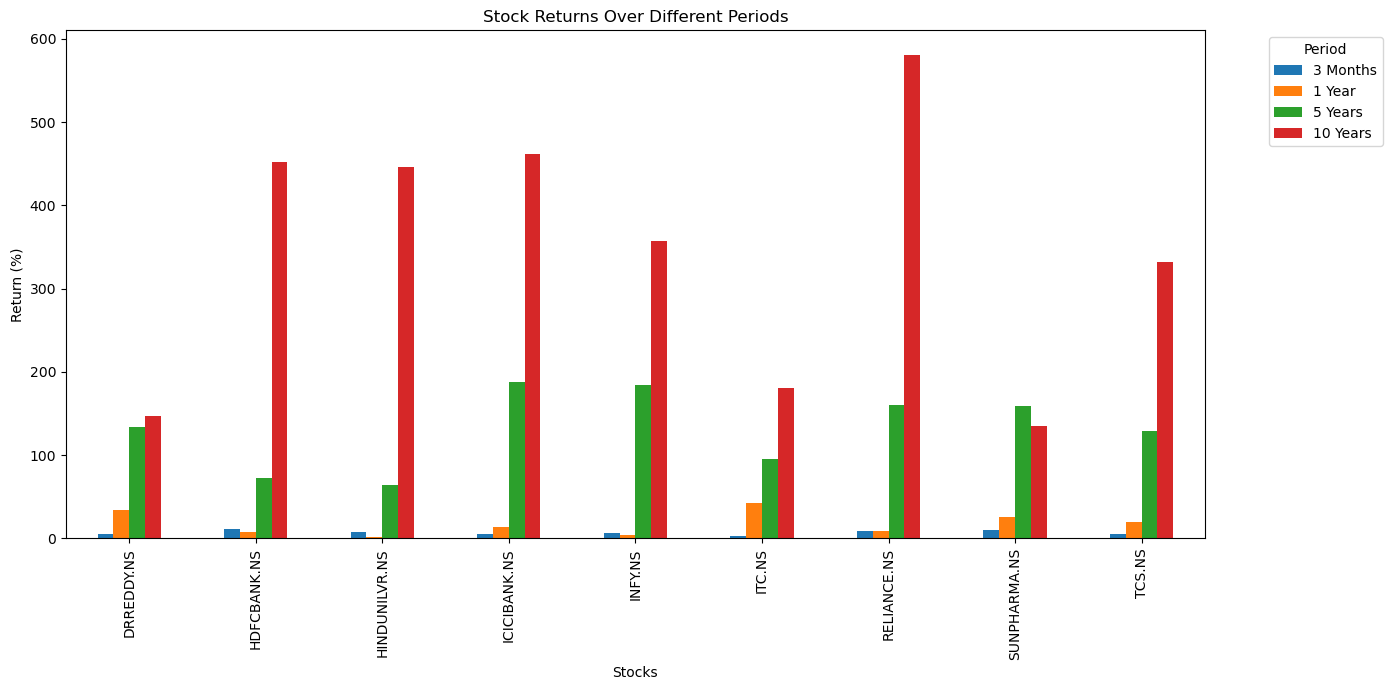

In [90]:
# Plot the returns as a bar chart
plt.figure(figsize=(14, 7))
returns_df.plot(kind='bar', ax=plt.gca())

# Adding titles, labels, and legends
plt.title('Stock Returns Over Different Periods')
plt.xlabel('Stocks')
plt.ylabel('Return (%)')
plt.legend(title='Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [98]:
# Calculate cumulative returns
Cumulative_Returns = returns_df['10 Years']


In [100]:
Cumulative_Returns

Ticker
DRREDDY.NS       146.714214
HDFCBANK.NS      452.741158
HINDUNILVR.NS    446.745048
ICICIBANK.NS     461.464437
INFY.NS          356.746058
ITC.NS           180.254829
RELIANCE.NS      581.225171
SUNPHARMA.NS     134.856730
TCS.NS           332.556975
Name: 10 Years, dtype: float64

In [118]:
# Calculate annualized returns
years = len(adj_close_prices) / 252  # Approx. number of trading days per year
annualized_returns = ((1 + (Cumulative_Returns)/100) ** (1 / years) - 1)*100

In [120]:
annualized_returns

Ticker
DRREDDY.NS        9.671680
HDFCBANK.NS      19.099222
HINDUNILVR.NS    18.966493
ICICIBANK.NS     19.290028
INFY.NS          16.799067
ITC.NS           11.110194
RELIANCE.NS      21.671353
SUNPHARMA.NS      9.120827
TCS.NS           16.151145
Name: 10 Years, dtype: float64

In [152]:
# Calculate the portfolio value growth assuming INR 1000 in each stock
initial_investment_per_stock = 10000  # Initial investment per stock
initial_investment_total = initial_investment_per_stock * len(stocks_symbol)

In [154]:
# Calculate the individual stock values over time based on initial investment
individual_stock_values = adj_close_prices / adj_close_prices.iloc[0] * initial_investment_per_stock

In [156]:
individual_stock_values

Ticker,DRREDDY.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,,,,,
2014-01-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2014-01-02,9964.725096,9877.471816,9826.155442,9798.670930,10036.187617,9768.918804,9844.735590,10026.208223,10063.623105
2014-01-03,9835.462507,9969.179886,9871.582364,9718.503450,10280.132424,9762.716552,9723.785921,10128.419605,10319.975620
2014-01-06,9739.105745,9948.132297,9845.374670,9481.643344,10143.886480,9790.630509,9619.149567,10277.803263,10400.780803
2014-01-07,9817.924855,9988.724934,9765.878821,9565.455738,9968.716499,9823.200456,9474.572775,10381.758874,10245.436178
...,...,...,...,...,...,...,...,...,...
2023-12-22,23947.181801,54032.328057,52861.222549,56016.867012,46266.664729,27607.011546,67598.084770,23191.044100,43604.627810
2023-12-26,23966.117700,54407.451327,53049.016843,56061.936720,45705.687612,27682.822371,67940.680464,23262.834238,43280.215486
2023-12-27,24316.536327,55081.706463,53532.353021,56464.754754,46390.999248,27722.243464,68172.592682,23355.139454,43458.669089


In [158]:
# Calculate the portfolio value as the sum of individual stock values
portfolio_value = individual_stock_values.sum(axis=1)

In [160]:
portfolio_value

Date
2014-01-01     90000.000000
2014-01-02     89206.696624
2014-01-03     89609.758330
2014-01-06     89246.506678
2014-01-07     89031.669131
                  ...      
2023-12-22    395125.032374
2023-12-26    395356.762761
2023-12-27    398494.994504
2023-12-28    400737.648700
2023-12-29    399330.462165
Length: 2465, dtype: float64

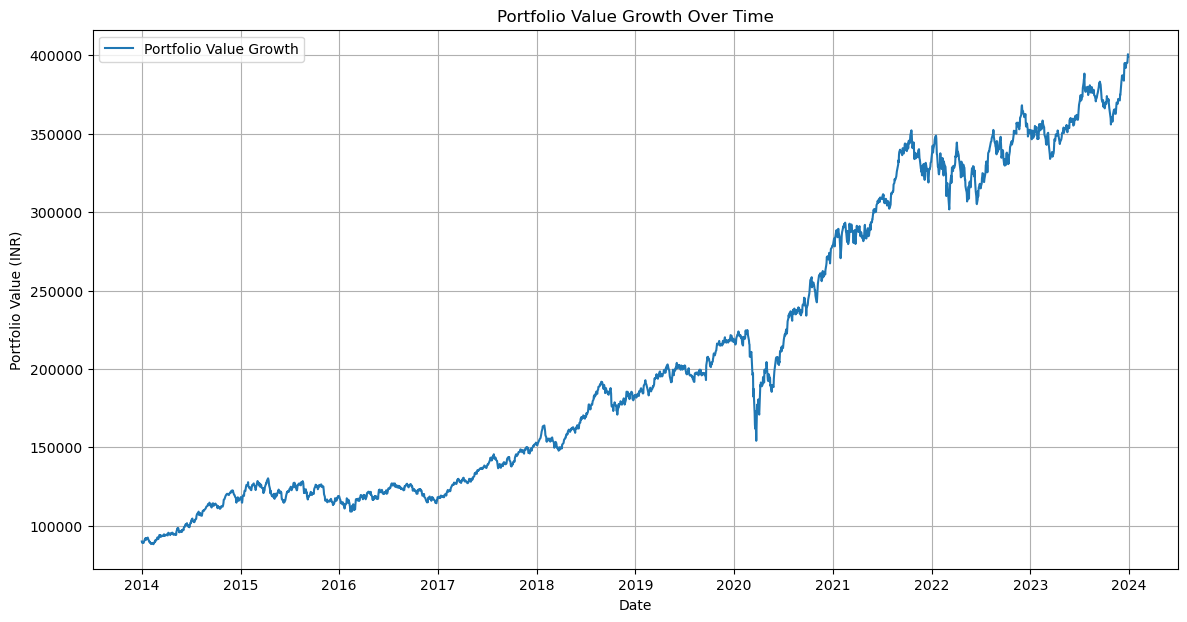

In [186]:
# Plot Portfolio Value Growth
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value.index, portfolio_value, label='Portfolio Value Growth')
plt.title('Portfolio Value Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [188]:
investment_values

Ticker,DRREDDY.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,RELIANCE.NS,SUNPHARMA.NS,TCS.NS
Date,,,,,,,,,
2014-01-01,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2014-01-02,9964.725096,9877.471816,9826.155442,9798.670930,10036.187617,9768.918804,9844.735590,10026.208223,10063.623105
2014-01-03,9835.462507,9969.179886,9871.582364,9718.503450,10280.132424,9762.716552,9723.785921,10128.419605,10319.975620
2014-01-06,9739.105745,9948.132297,9845.374670,9481.643344,10143.886480,9790.630509,9619.149567,10277.803263,10400.780803
2014-01-07,9817.924855,9988.724934,9765.878821,9565.455738,9968.716499,9823.200456,9474.572775,10381.758874,10245.436178
...,...,...,...,...,...,...,...,...,...
2023-12-22,23947.181801,54032.328057,52861.222549,56016.867012,46266.664729,27607.011546,67598.084770,23191.044100,43604.627810
2023-12-26,23966.117700,54407.451327,53049.016843,56061.936720,45705.687612,27682.822371,67940.680464,23262.834238,43280.215486
2023-12-27,24316.536327,55081.706463,53532.353021,56464.754754,46390.999248,27722.243464,68172.592682,23355.139454,43458.669089


In [257]:

portfolio_distribution1 = investment_values.iloc[-1]/investment_values.iloc[-1].sum()

In [259]:
portfolio_distribution1

Ticker
DRREDDY.NS       0.061782
HDFCBANK.NS      0.138417
HINDUNILVR.NS    0.136915
ICICIBANK.NS     0.140601
INFY.NS          0.114378
ITC.NS           0.070181
RELIANCE.NS      0.170592
SUNPHARMA.NS     0.058813
TCS.NS           0.108321
Name: 2023-12-29 00:00:00, dtype: float64

In [251]:
# Provided data
data = {
    'Ticker': ['DRREDDY.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INFY.NS', 'ITC.NS', 'RELIANCE.NS', 'SUNPHARMA.NS', 'TCS.NS'],
    'Value': [0.061782, 0.138417, 0.136915, 0.140601, 0.114378, 0.070181, 0.170592, 0.058813, 0.108321]
}



In [253]:
# Convert to DataFrame
df = pd.DataFrame(data)
df.set_index('Ticker', inplace=True)

In [255]:

df

,Value
Ticker,
DRREDDY.NS,0.061782
HDFCBANK.NS,0.138417
HINDUNILVR.NS,0.136915
ICICIBANK.NS,0.140601
INFY.NS,0.114378
ITC.NS,0.070181
RELIANCE.NS,0.170592
SUNPHARMA.NS,0.058813
TCS.NS,0.108321


In [261]:
# Calculate portfolio distribution
portfolio_distribution = df['Value'] / df['Value'].sum()

In [263]:
# Create a custom format function for displaying actual values
def format_func(value):
    return f'{value:.6f}'


In [265]:
# Create a custom format function for displaying actual values
def format_func(value):
    return f'{value:.6f}'


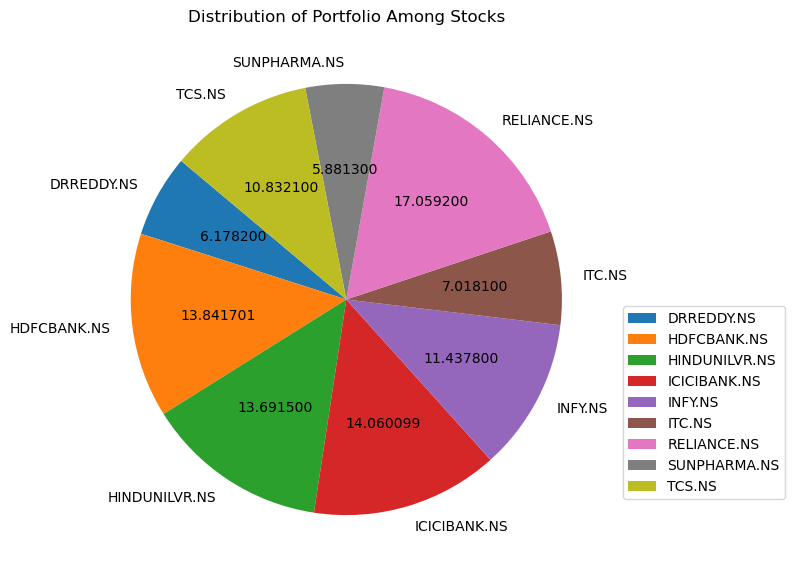

In [267]:
# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(portfolio_distribution, labels=df.index, autopct=lambda p: format_func(p * portfolio_distribution.sum()), startangle=140)
plt.title('Distribution of Portfolio Among Stocks')
plt.legend(df.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

In [271]:
# Fetch historical data for the Nifty 50 for the last 10 years
nifty50_data = yf.download('^NSEI', start='2014-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [273]:
nifty50_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100
2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000
2014-01-06,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300
2014-01-07,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600
2014-01-08,6178.049805,6192.100098,6160.350098,6174.600098,6174.600098,146900
...,...,...,...,...,...,...
2023-12-22,21295.849609,21390.500000,21232.449219,21349.400391,21349.400391,284700
2023-12-26,21365.199219,21477.150391,21329.449219,21441.349609,21441.349609,219500
2023-12-27,21497.650391,21675.750000,21495.800781,21654.750000,21654.750000,256500


In [315]:
nifty50_adj_close_prices = nifty50_data['Adj Close']

In [317]:
nifty50_adj_close_prices

Date
2014-01-02     6221.149902
2014-01-03     6211.149902
2014-01-06     6191.450195
2014-01-07     6162.250000
2014-01-08     6174.600098
                  ...     
2023-12-22    21349.400391
2023-12-26    21441.349609
2023-12-27    21654.750000
2023-12-28    21778.699219
2023-12-29    21731.400391
Name: Adj Close, Length: 2453, dtype: float64

In [325]:
initial_investment_nifty = 90000
nifty50_investment_value = (nifty50_adj_close_prices / nifty50_adj_close_prices.iloc[0]) * initial_investment_nifty

In [281]:
# Calculate cumulative returns
nifty50_cumulative_returns = ((nifty50_close.iloc[-1]/nifty50_close.iloc[0])-1)*100

In [283]:
nifty50_cumulative_returns

249.31484905126516

In [295]:
# Calculate annualized returns
years = len(adj_close_prices) / 252
nifty50_annualized_return = ((1 + (nifty50_cumulative_returns)/100) ** (1 / years) - 1)*100

In [297]:
nifty50_annualized_return

13.640660929981753

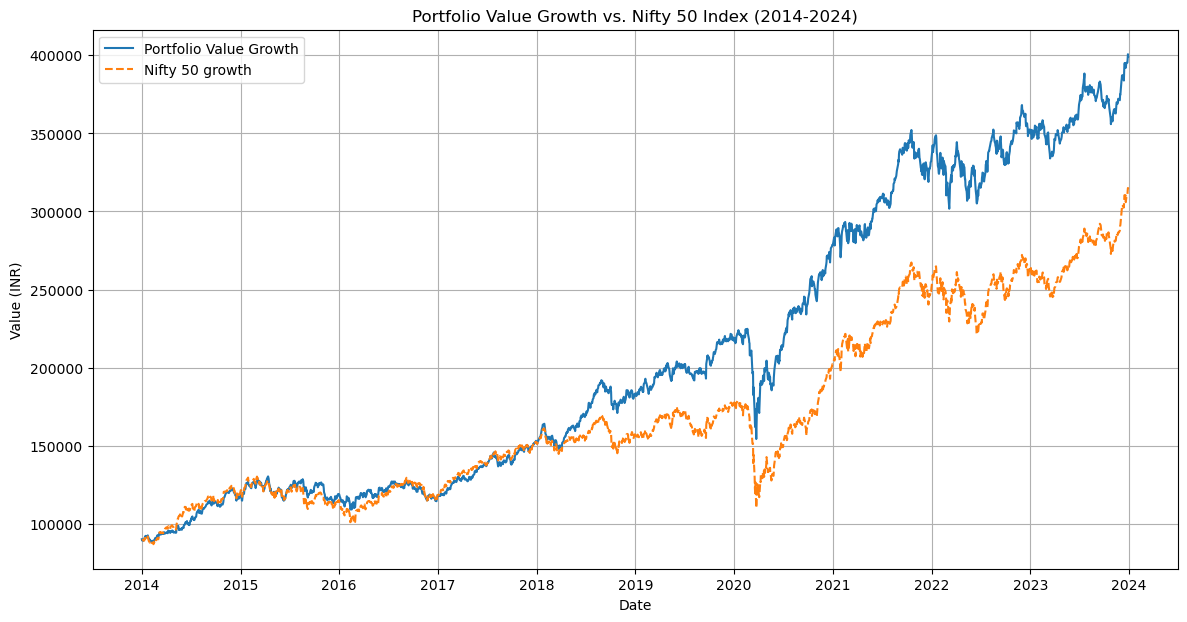

In [327]:
# Plot Portfolio Value Growth vs. Nifty 50
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value.index, portfolio_value, label='Portfolio Value Growth')
plt.plot(nifty50_investment_value.index, nifty50_investment_value, label='Nifty 50 growth',linestyle ='--')
plt.title('Portfolio Value Growth vs. Nifty 50 Index (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Value (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [329]:
final_value = nifty50_investment_value.iloc[-1]
print(f"If you had invested INR 90000 in nifty 50 on 2014-01-01, your investment would be worth INR {final_value:.2f} on 2024-01-01.")

If you had invested INR 90000 in nifty 50 on 2014-01-01, your investment would be worth INR 314383.36 on 2024-01-01.
